#  UFRN
## Disciplina: Aprendizado Não Supervisionado de Máquinas

##Assunto: Bases de dados e Introdução à PCA

Aluno: José Augusto Agripino de Oliveira

Prof. Luiz Affonso Guedes

PPGEEC - UFRN
2025-2

## Terceira Lista de Simulação - Aplicação de PCA
### Questão 1
- Refaça o exemplo de aplicação de PCA para a base de dados Cancer ou base de dados Digits

### Questão 2
- Refaça o exemplo de aplicação de PCA na base de dados Curva_S ou Rolo_Suiço.

### Tarefa:
- Grave um vídeo de até 5 minutos explicando a resolução dessas questões.

In [ ]:
# Importação de Pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_s_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Base de Dados de Câncer

In [ ]:
# Carrega conjunto de dados
cancer = load_breast_cancer()

# Converter para DataFrame para visualizar melhor
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Mostrar as 5 primeiras linhas
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_target = pd.DataFrame(cancer.target, columns=['Cancer'])
print(np.unique(df_target))
df_target.head()

[0 1]


,Cancer
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Shape dos dados
X_cancer = cancer.data
y_cancer = cancer.target
print(X_cancer.shape, y_cancer.shape)

(569, 30) (569,)


In [ ]:
# Normalização das variáveis - remoção de médias
sc = StandardScaler()
transformed_df = sc.fit_transform(X_cancer)

In [ ]:
# Obtenção da Matriz de Covariância
covariance_matrix = np.cov(transformed_df.T)
covariance_matrix

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

Aqui estão sendo encontrado os Autovalores e Autovetores da matriz de covariância.

- Cada autovetor representa a direção de um componente principal.
- Cada autovalor representa a variância explicada nessa direção.

Desse modo, quanto maior o autovalor, maior é a variância explicada (informação) na direção obtida pelo autovetor.

[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


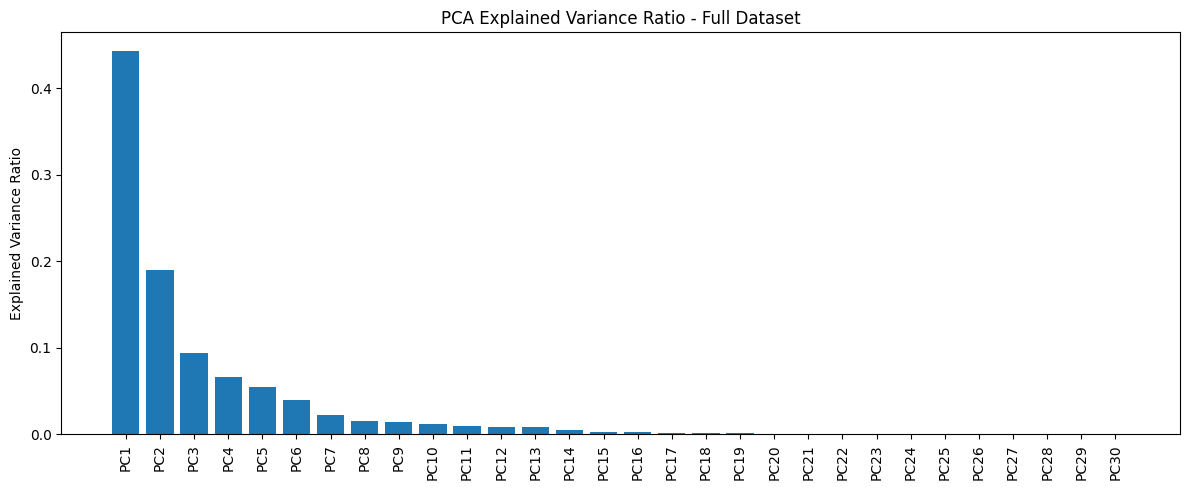

In [ ]:
# Autovalores e Autovetores
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Ordenação (do maior autovalor para o menor)
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values_sorted = eigen_values[sorted_idx]
eigen_vectors_sorted = eigen_vectors[:, sorted_idx]
print(eigen_values_sorted)

# Variância explicada
explained_variance_ratio = eigen_values_sorted / np.sum(eigen_values_sorted)

# Gráfico — agora com TODOS os PCs do dataset cancer (30 variáveis)
n, p = X_cancer.shape
PC_labels = [f"PC{i+1}" for i in range(p)]
y_pos = np.arange(p)

plt.figure(figsize=(12,5))
plt.bar(y_pos, explained_variance_ratio)
plt.xticks(y_pos, PC_labels, rotation=90)
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance Ratio - Full Dataset")
plt.tight_layout()
plt.show()

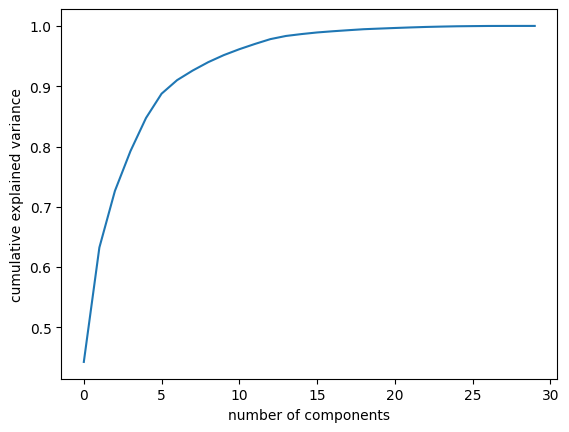

In [ ]:
# Cálculo do acumulado das contribuições de cada componente
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(transformed_df)
pca_2d = pca.transform(X_cancer)

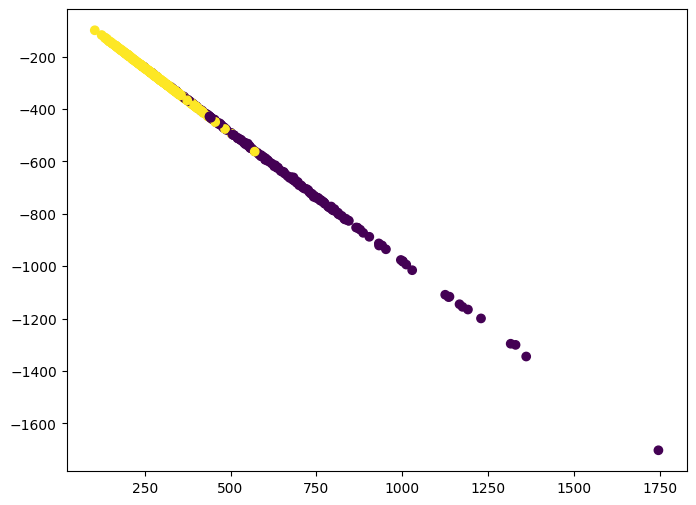

In [ ]:
# Plotando só as duas primeiras componentes
plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1],c=y_cancer)
plt.show()

### Base de Dados make_s_curve (Curva S)

In [ ]:
n_points = 2000
X_s_curve, color = make_s_curve(n_points, random_state=0)

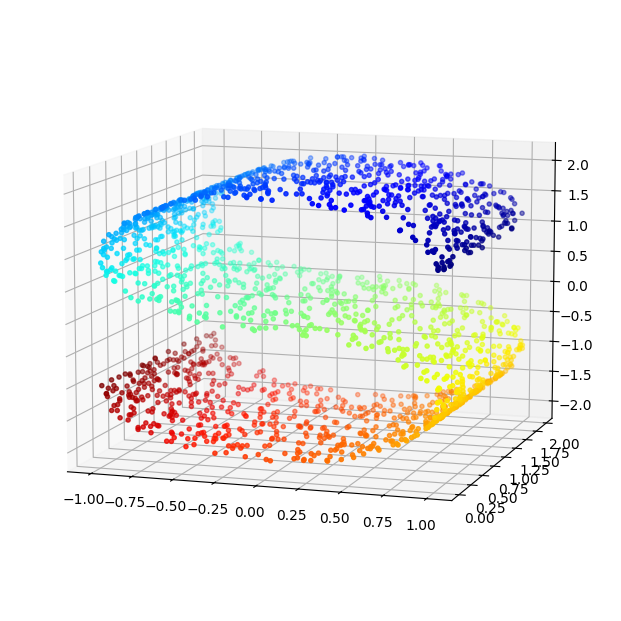

In [ ]:
fig = plt.figure(figsize=(45, 25))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X_s_curve[:, 0], X_s_curve[:, 1], X_s_curve[:, 2], c=color, cmap=plt.cm.jet, s=9, lw=1)
ax.view_init(10, -72)

In [ ]:
# Converter para DataFrame para visualizar melhor
df_s_curve = pd.DataFrame(X_s_curve, columns=['X', 'Y', 'Z'])

# Mostrar as 5 primeiras linhas
df_s_curve.head()

,X,Y,Z
0,0.443999,1.623037,-0.103973
1,0.897241,0.952168,-1.441541
2,0.824049,1.046312,-0.433482
3,0.410511,0.501041,-0.088144
4,-0.659036,1.210086,0.247889


In [ ]:
# Converter para DataFrame para visualizar melhor
color_s_curve = pd.DataFrame(color, columns=['color'])

# Mostrar as 5 primeiras linhas
color_s_curve.head()

,color
0,0.460056
1,2.028112
2,0.968522
3,0.423014
4,-0.719537


In [ ]:
print(X_s_curve.shape, color.shape)

(2000, 3) (2000,)


In [ ]:
# Normalização das variáveis - remoção de médias
sc = StandardScaler()
transformed_df_s_curve = sc.fit_transform(X_s_curve)

In [ ]:
# Obtenção da Matriz de Covariância
covariance_matrix_s_curve = np.cov(transformed_df_s_curve.T)
covariance_matrix_s_curve

array([[ 1.00050025,  0.02909167, -0.07486452],
       [ 0.02909167,  1.00050025,  0.02264888],
       [-0.07486452,  0.02264888,  1.00050025]])

[1.07567802 1.01511501 0.91070772]


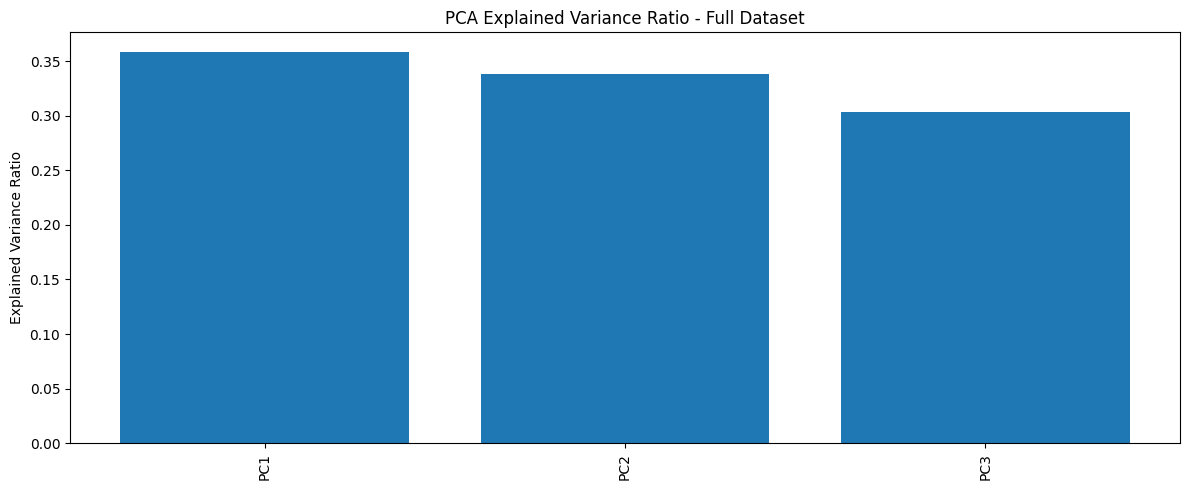

In [ ]:
# Autovalores e Autovetores
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix_s_curve)

# Ordenação (do maior autovalor para o menor)
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values_sorted = eigen_values[sorted_idx]
eigen_vectors_sorted = eigen_vectors[:, sorted_idx]
print(eigen_values_sorted)

# Variância explicada
explained_variance_ratio = eigen_values_sorted / np.sum(eigen_values_sorted)

# Gráfico — agora com TODOS os PCs da curva S
n, p = X_s_curve.shape
PC_labels = [f"PC{i+1}" for i in range(p)]
y_pos = np.arange(p)

plt.figure(figsize=(12,5))
plt.bar(y_pos, explained_variance_ratio)
plt.xticks(y_pos, PC_labels, rotation=90)
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance Ratio - Full Dataset")
plt.tight_layout()
plt.show()

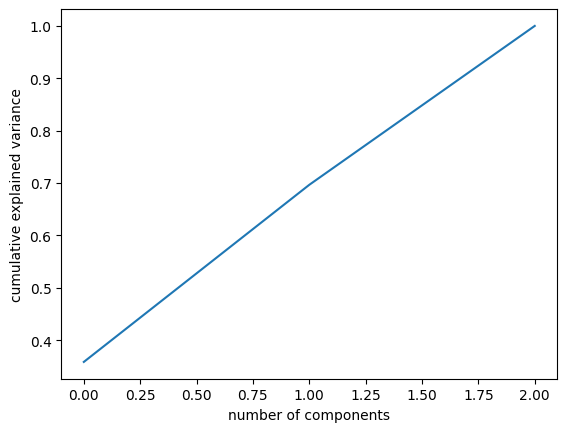

In [ ]:
# Cálculo do acumulado das contribuições de cada componente
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(transformed_df_s_curve)
pca_2d = pca.transform(X_s_curve)

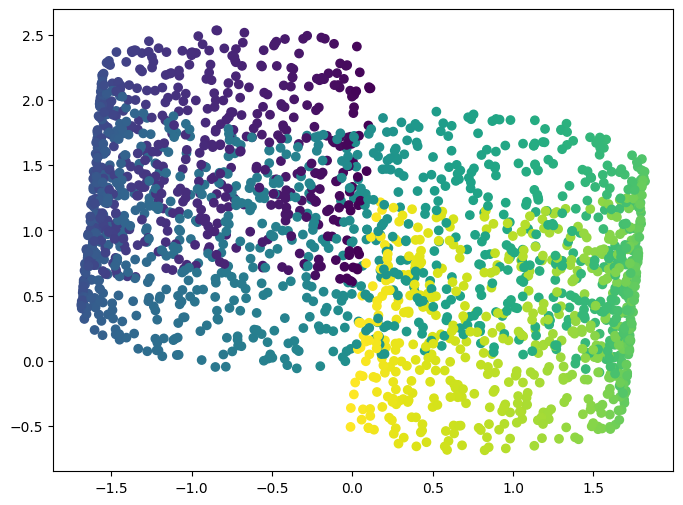

In [ ]:
# Plotando só as duas primeiras componentes
plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1],c=color)
plt.show()